> Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is the strain of coronavirus that causes coronavirus disease 2019 (COVID-19), a respiratory illness. Colloquially known as coronavirus, it was previously referred to by its provisional name 2019 novel coronavirus (2019-nCoV). As described by the National Institutes of Health, it is the successor to SARS-CoV-1. SARS-CoV-2 is a positive-sense single-stranded RNA virus. It is contagious in humans, and the World Health Organization (WHO) has designated the ongoing pandemic of COVID-19 a Public Health Emergency of International Concern.

 > Taxonomically, SARS-CoV-2 is a strain of severe acute respiratory syndrome-related coronavirus (SARSr-CoV).It is believed to have zoonotic origins and has close genetic similarity to bat coronaviruses, suggesting it emerged from a bat-borne virus.There is no evidence yet to link an intermediate animal reservoir, such as a pangolin, to its introduction to humans.The virus shows little genetic diversity, indicating that the spillover event introducing SARS-CoV-2 to humans is likely to have occurred in late 2019.

> Epidemiological studies estimate each infection results in 1.4 to 3.9 new ones when no members of the community are immune and no preventive measures taken. The virus primarily spreads between people through close contact and via respiratory droplets produced from coughs or sneezes.It mainly enters human cells by binding to the receptor angiotensin converting enzyme 2 (ACE2)

#### Dataset Description - Collection Chest X Ray of Healthy vs Pneumonia (Corona) affected patients infected patients along with few other categories such as SARS (Severe Acute Respiratory Syndrome ) ,Streptococcus & ARDS (Acute Respiratory Distress Syndrome)




<img src = "https://img.etimg.com/thumb/width-640,height-480,imgsize-208858,resizemode-1,msid-74124598/corona-outbreak-in-china-hits-low-cost-garment-market-in-rural-bengal.jpg">


<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content:</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#one_" role="tab" aria-controls="profile">1. Importing Libraries<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#two_" role="tab" aria-controls="messages">2. Exploratory Data Analysis<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#three_" role="tab" aria-controls="settings">3. Data Preprocessing<span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action"  data-toggle="list" href="#four_" role="tab" aria-controls="settings">4. Transfer Learning -RESNET34<span class="badge badge-primary badge-pill">4</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#five_" role="tab" aria-controls="settings">5. Transfer Learning -RESNET50<span class="badge badge-primary badge-pill">5</span></a>

# 1.Import Libraries

In [2]:
from numpy.random import seed
seed(101)

import pandas as pd
import numpy as np
from glob import glob 

from fastai.vision import *
from fastai.metrics import error_rate
import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.listdir('./kaggle/input')

['coronahack-chest-xraydataset']

# 2.Exploratory Data Analysis

In [4]:
print(len(os.listdir('kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/')))
print(len(os.listdir('kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/')))


5503
600


In [5]:
path_train = "kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/"
path_test = "kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/"
meta_path = "kaggle/input/coronahack-chest-xraydataset/"

In [6]:
meta_data = pd.read_csv(meta_path+'Chest_xray_Corona_Metadata.csv',index_col=[0])
meta_data.head()

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


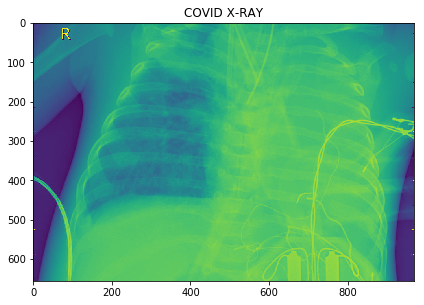

In [7]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
img = glob(path_train+"/*.jpeg") 
img = np.asarray(plt.imread(img[0]))
plt.title('COVID X-RAY')
plt.imshow(img)

# 3.Data Preprocessing

In [8]:
os.mkdir("kaggle/corona_check")
os.mkdir("kaggle/corona_check/train")
os.mkdir("kaggle/corona_check/test")
os.mkdir("kaggle/corona_check/train/Normal/")
os.mkdir("kaggle/corona_check/train/COVID19/")
os.mkdir("kaggle/corona_check/test/Normal/")
os.mkdir("kaggle/corona_check/test/COVID19/")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'kaggle/corona_check'

In [ ]:
!cd /kaggle/corona_check/train/
!rm /kaggle/corona_check/train/*.jpeg

!cd /kaggle/corona_check/test/
!rm /kaggle/corona_check/test/*.jpeg

In [ ]:
def copy_img(src_path,dst_path):
    try:
        shutil.copy(src_path, dst_path)
        stmt ='File Copied'
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
        stmt ='Copy Failed - IO Error'
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))
        stmt ='Copy Failed - other Error'+ sys.exc_info()
        
    return stmt

In [ ]:
data_dir="./kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"
metadata_path="./kaggle/input/coronahack-chest-xraydataset/"

In [ ]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [ ]:
meta_data['File_path']=''
meta_data.loc[meta_data['Dataset_type']=='TRAIN','File_path']=train_dir+'/'
meta_data.loc[meta_data['Dataset_type']=='TEST','File_path']=test_dir+'/'
meta_data['X_ray_img_nm_path']=meta_data['File_path']+meta_data['X_ray_image_name']

In [ ]:
meta_data.head()

In [ ]:
meta_COVID_19_train = meta_data[(meta_data['Dataset_type']=='TRAIN') & 
                        ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & (meta_data['Label_2_Virus_category']=='COVID-19'))]


meta_COVID_19_test = meta_data[(meta_data['Dataset_type']=='TEST') & 
                        ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & (meta_data['Label_2_Virus_category']=='COVID-19'))]


## Moving the 10 Corona Infected dataset to Test

meta_data_covid_test = meta_data[meta_data['Label_2_Virus_category']=='COVID-19'].sample(12)
meta_COVID_19_train = meta_COVID_19_train[~meta_COVID_19_train['X_ray_image_name'].isin(meta_data_covid_test['X_ray_image_name'])]
meta_COVID_19_test_fnl = pd.concat([meta_data_covid_test,meta_COVID_19_test],ignore_index=False)

In [ ]:
meta_COVID_19_train.loc[meta_COVID_19_train['Label'] =='Pnemonia','Label']='COVID19'
meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label'] =='Pnemonia','Label']='COVID19'

In [ ]:
meta_COVID_19_train['Img_tgt_path']="/kaggle/corona_check/train/"
meta_COVID_19_test_fnl['Img_tgt_path']="/kaggle/corona_check/test/"

In [ ]:
meta_COVID_19_train.loc[meta_COVID_19_train['Label']=='Normal','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'Normal/'
meta_COVID_19_train.loc[meta_COVID_19_train['Label']=='COVID19','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'COVID19/'

meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label']=='Normal','Img_tgt_path']=meta_COVID_19_test_fnl['Img_tgt_path']+'Normal/'
meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label']=='COVID19','Img_tgt_path']=meta_COVID_19_test_fnl['Img_tgt_path']+'COVID19/'

In [ ]:
#dirname = '/kaggle/corona_check/'
dirname = '../data_TransferLearning/'


train_path = os.path.join(dirname, 'train/')
train_nrml_pth = os.path.join(train_path, 'Normal/')
train_covid19_pth = os.path.join(train_path, 'Covid/')

test_path = os.path.join(dirname, 'test/')
test_nrml_pth = os.path.join(train_path, 'Normal/')
test_covid19_pth = os.path.join(train_path, 'Covid/')

In [ ]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
img = glob(train_nrml_pth+"/*.jpeg")
img = np.asarray(plt.imread(img[0]))
plt.title('Normal Chest X-RAY')
plt.imshow(img)

plt.subplot(1 , 2 , 2)
img = glob(train_covid19_pth+"/*.jpeg") 
img = np.asarray(plt.imread(img[0]))
plt.title('COVID CHEST X-RAY')
plt.imshow(img)

plt.show()

In [ ]:
src = (ImageList.from_folder(dirname)
       .split_by_rand_pct(valid_pct=0.2)
       .label_from_folder()
       .transform(get_transforms(), size=256)
       .add_test_folder(test_path))

In [ ]:
data = (src.databunch(bs=32)
        .normalize(imagenet_stats))

data = data.show_batch(rows=3,figsize=(8,8))
data

In [ ]:
#lets recheck the classes
data.classes

In [ ]:
print(data.c, len(data.train_ds), len(data.valid_ds))

# 4.Transfer Learning - RESNET34

In [ ]:
learner34=cnn_learner(data,models.resnet34,metrics=accuracy)

In [ ]:
#Model Training
learner34.fit_one_cycle(4)

In [ ]:
#find the learning rate and plot the learning rate
lr=1e-2
learner34.fit_one_cycle(4,slice(lr))
learner34.recorder.plot()
learner34.save('stage-1')

In [ ]:
#Plot the losses of the model
interp=ClassificationInterpretation.from_learner(learner34)
losses,idxs = interp.top_losses()
interp.plot_top_losses(9,figsize=(12,12))
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
#Plot a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learner34.export(file = Path("/output/export.pkl"))

In [ ]:
learner34.save('stage-1')

# 5.Transfer Learning - RESNET50

In [ ]:
learner50=cnn_learner(data,models.resnet50,metrics=accuracy)

In [ ]:
#Model Training
learner50.lr_find()
learner50.recorder.plot()

In [ ]:
#find the learning rate and plot the learning rate
lr=1e-2
learner50.fit_one_cycle(4,slice(lr))
learner50.recorder.plot()
learner50.save('stage-2')

In [ ]:
#Plot the losses of the model
interp=ClassificationInterpretation.from_learner(learner50)
interp.plot_top_losses(9,figsize=(12,12))
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
#Plot a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learner50.show_results()

### References
 - [Coronahack-EDA](https://www.kaggle.com/praveengovi/coronahack-eda-and-baseline-model-final)
 - [FASTAI Doc](https://docs.fast.ai/vision.html#vision)

<font color='blue'>Demo Application for Detecting COVID-19 using FASTAI on GitHub Repo .</font> <br> <br>

[Github](https://github.com/shashwatwork/COVID-19-Chest-XRay-detection) <br> <br> 

<font color='blue'>If you find this kernel awesome and useful please hit upvote 😊 .</font> <br> <br>


<font color='blue'>Cheers!!!! </font>